In [5]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt

In [33]:
adata = sc.read_h5ad("C:/Users/25178/Documents/GTM/data/Large_Intestine.h5ad")

sc.pp.normalize_total(adata , target_sum=1e4)  # 标准化到10,000
sc.pp.log1p(adata )
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
adata = adata[:, adata.var.highly_variable]

sc.pp.scale(adata, max_value=10)
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

sc.tl.leiden(adata, resolution=0.72)

D:\GTM\python\1\Lib\site-packages\scanpy\preprocessing\_scale.py:318: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


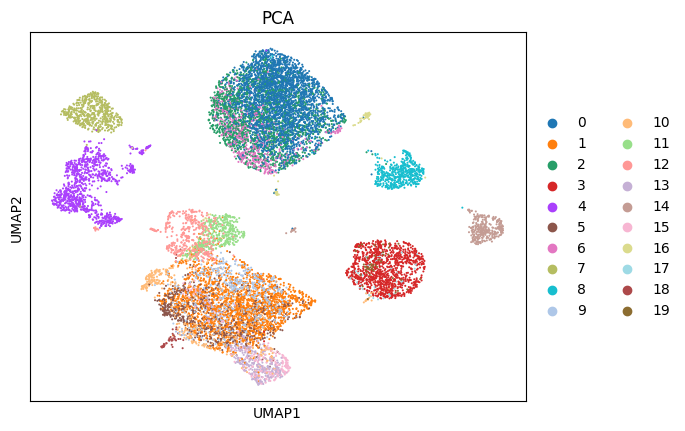

In [34]:
# visualization
adata.obs['PCA'] = adata.obs['leiden'].astype('category')
sc.pl.umap(adata, color=['PCA'])
plt.show()

In [35]:
clustering_results = adata.obs[['cell_ontology_class', 'PCA']].copy()
clustering_results
clustering_results.to_csv("D:/GTM/result/PCA_Large_Intestine_results.csv", index_label='cell_id')